In [1]:
from pv_analyzer import pv_analyze
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib widget

In [3]:
def emp_kep_v(v_rot, v_100):        
        r_au = 100.*np.power(v_100/v_rot, 2)
        return r_au

def emp_kep_r(r, r_b, v_100):
        v_r = v_100*(r/r_b)**(-0.5)
        return v_r

In [4]:
# define fix r points
# Get equidistance points

r_au_empkep_rs_fix_r = np.arange(start=42., step=42., stop=840.)
r_au_empkep_bs_fix_r = -r_au_empkep_rs_fix_r

v_100 = 2.842 #kmps # idpft-2.674 # JS- 3.2 # newft 2.842

v_rot_empkep_rs_fix_r =  emp_kep_r(r=r_au_empkep_rs_fix_r, r_b=100., v_100=v_100)
v_rot_empkep_bs_fix_r = - v_rot_empkep_rs_fix_r

plot_points = [r_au_empkep_rs_fix_r, v_rot_empkep_rs_fix_r, r_au_empkep_bs_fix_r, v_rot_empkep_bs_fix_r]

In [5]:
# Evaluate empirical keplerian curve function
r_rs_func = np.arange(start=1., step=0.5, stop=840.)   # Note that this is in AU
v_rs_func = emp_kep_r(r=r_rs_func, r_b=100., v_100=v_100)

r_bs_func = -r_rs_func
v_bs_func = -v_rs_func

In [6]:
Tb_at_inc_i = {}

for i in range(68,79):

    pv_file = "L1489irs_model_i_"+str(i)+".0_PV.fits"

    print(pv_file)

    # Read b7 data
    pv_b6 = pv_analyze(pv_path=pv_file,
                        is_Tb=False, v_sys=7.33) # V_sys - 7.22, 7.27 7.33
    pv_b6.read_pv(print_details = True)

    if i == 73:
        pv_b6_73 = pv_b6

    Tb_df_b6 = pv_b6.get_tb_on_curve(curve_function = plot_points, 
                                get_surrounding_pix = False, mode='vals',
                                num_pix = 3)
    
    Tb_at_inc_i[str(i)] = Tb_df_b6["Tb_on_point_rs"]

L1489irs_model_i_68.0_PV.fits
Convert frequency to velocity
 rms = 3.24e-12 Jy beam$^-1$
L1489irs_model_i_69.0_PV.fits
Convert frequency to velocity
 rms = 3.31e-12 Jy beam$^-1$
L1489irs_model_i_70.0_PV.fits
Convert frequency to velocity
 rms = 3.67e-12 Jy beam$^-1$
L1489irs_model_i_71.0_PV.fits
Convert frequency to velocity
 rms = 3.41e-12 Jy beam$^-1$
L1489irs_model_i_72.0_PV.fits
Convert frequency to velocity
 rms = 3.31e-12 Jy beam$^-1$
L1489irs_model_i_73.0_PV.fits
Convert frequency to velocity
 rms = 2.99e-12 Jy beam$^-1$
L1489irs_model_i_74.0_PV.fits
Convert frequency to velocity
 rms = 2.99e-12 Jy beam$^-1$
L1489irs_model_i_75.0_PV.fits
Convert frequency to velocity
 rms = 3.50e-12 Jy beam$^-1$
L1489irs_model_i_76.0_PV.fits
Convert frequency to velocity
 rms = 1.97e-11 Jy beam$^-1$
L1489irs_model_i_77.0_PV.fits
Convert frequency to velocity
 rms = 1.85e-11 Jy beam$^-1$
L1489irs_model_i_78.0_PV.fits
Convert frequency to velocity
 rms = 1.85e-11 Jy beam$^-1$


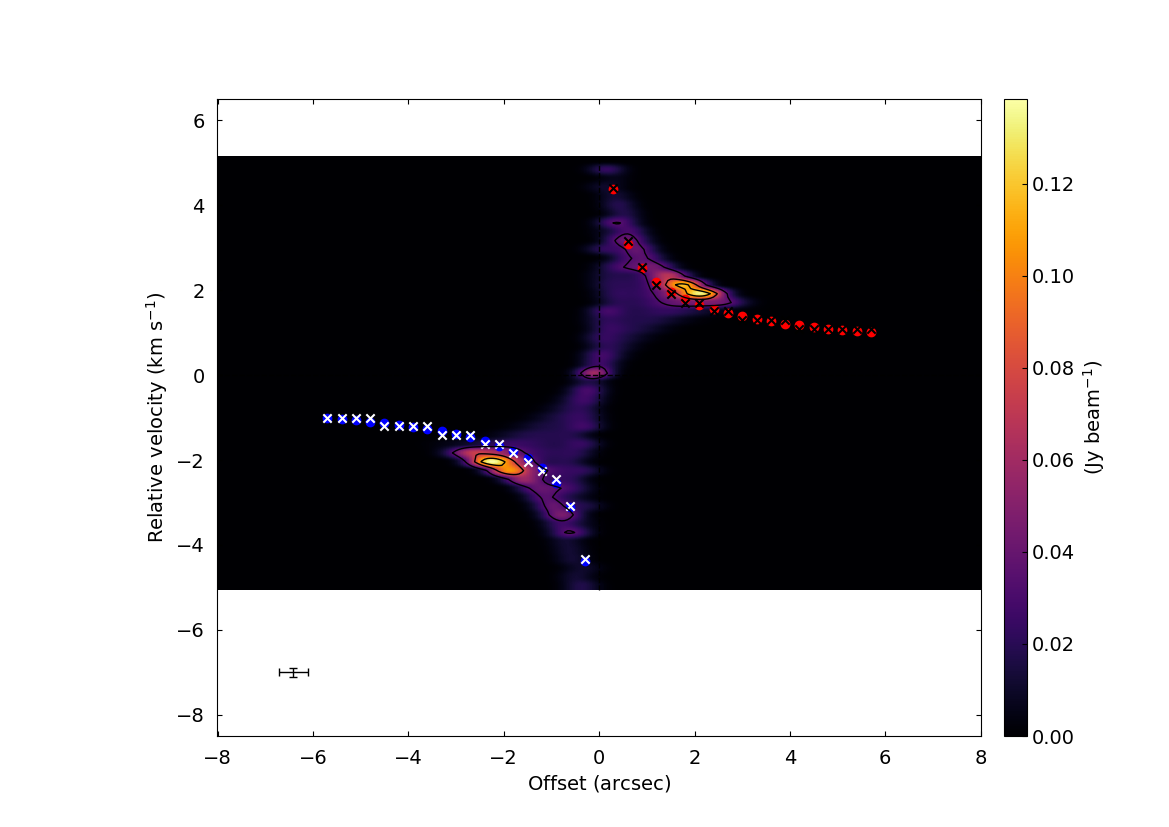

In [12]:
pv_dia6 = pv_b6_73.plot_pv(plot_curve=True, base_ctr_lvl= 0.011)
#pv_dia6[0].plot(r_rs_func/140.,v_rs_func,color = 'lime', alpha = 0.5)
#pv_dia6[0].plot(r_bs_func/140.,v_bs_func,color = 'lime', alpha = 0.5)

Text(0.5, 0.98, 'Tb_vs_R_(rs)_fix_dist')

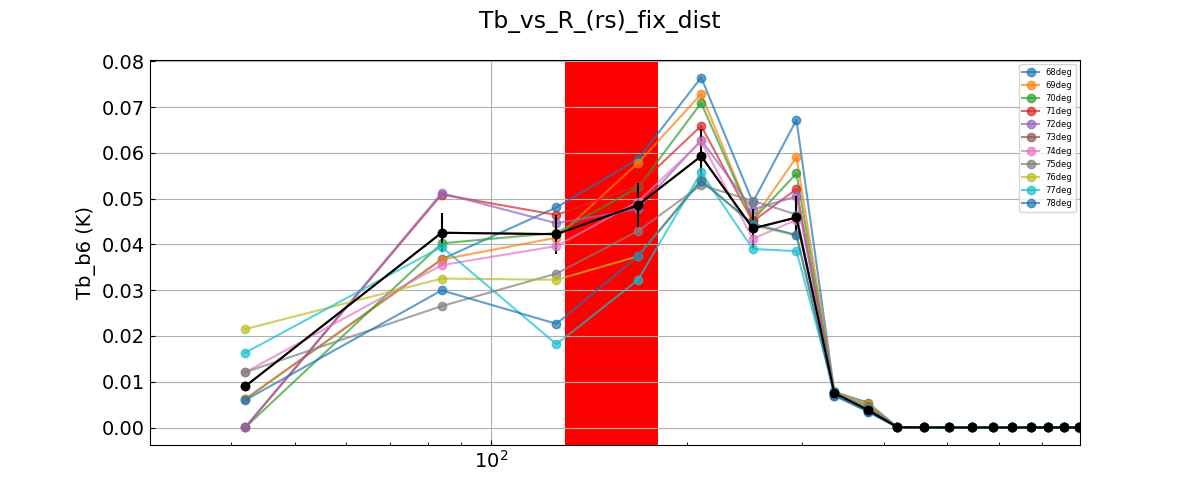

In [13]:
# Visualization


vis_results_fig, axes = plt.subplots(1, figsize=(12, 5), sharex=True)

for i in range(68,79):


    axes.plot(r_au_empkep_rs_fix_r, Tb_at_inc_i[str(i)], marker='o', alpha = 0.7, label = str(i) + "deg")

    if i == 73:
        axes.errorbar(r_au_empkep_rs_fix_r, Tb_at_inc_i[str(i)], yerr=0.1*np.array(Tb_at_inc_i[str(i)]),
                      color='k', marker='o')


    axes.axvspan(xmin = 130, xmax=180, facecolor='r', alpha=0.5)
    axes.set_xscale('log')
    #axes.set_yscale('log')
    axes.set_xlim((30,800))
    axes.set_ylabel(r"Tb_b6 (K)")
    axes.grid(True)
    axes.legend(prop={'size': 6})



vis_results_fig.suptitle("Tb_vs_R_(rs)_fix_dist")

#vis_results_figname =  'Tb_rs_vs_r.jpg'
#dir_path = os.path.join(os.path.abspath(os.getcwd()),"PV_comparision_results",)


#if not os.path.isdir(dir_path):
#    os.mkdir(dir_path)
#vis_results_figpath = os.path.join(dir_path, vis_results_figname)
#vis_results_fig.savefig(fname = vis_results_figpath, dpi=300, format='jpeg')